# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

# Scoping

## Project Goals

  - What is the distribution of conservation status for species?
  - Are certain types of species more likely to be endangered?
  - Are the differences between species and their conservation status significant?
  - Which species is the most prevalent?
  - Which park has the most animals?

## Data

The data has been provided by CodeCademy. We have 2 files in a csv format. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

## Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

# Loading the Data

In [2]:
# Loading  the first csv with the observations
obs = pd.read_csv('observations.csv')
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
# Loading  the second csv with the species info
spe = pd.read_csv('species_info.csv')
spe.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


# Data Characteristics

Checking how many rows and columns we have.

In [4]:
print(f'Observations shape: {obs.shape}\n\n')
print(f'Are there any null values on observation dataset?: \n{obs.isnull().sum()}\n\n')
print(f'Species_info shape: {spe.shape}\n\n')
print(f'Are there any null values on species_info dataset?: \n{spe.isnull().sum()}')

Observations shape: (23296, 3)


Are there any null values on observation dataset?: 
scientific_name    0
park_name          0
observations       0
dtype: int64


Species_info shape: (5824, 4)


Are there any null values on species_info dataset?: 
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64


Note: We can see that we have a lot more observations than species_info. conservation status has most of its values as null.

# Explore the data

We will start by exploring the observations and then the species.

In [5]:
print(f'Number of parks: {obs.park_name.nunique()}')
print(f'Names of the parks:\n{obs.park_name.unique()}') # We are checking if there is a duplication or typo
print(f'Number of data per park:\n{obs.park_name.value_counts()}')

Number of parks: 4
Names of the parks:
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
Number of data per park:
Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Bryce National Park                    5824
Yellowstone National Park              5824
Name: park_name, dtype: int64


Note: All the parks have the same species since we have exactly 5824 observations in each park, or proably there is an issue with the data. I am leaning more towards the latter. This needs to be double checked.

In [6]:
print(obs.observations.min()) # The minimum number of the column observations

9


We see that the minimum number is not 0 which is good news! This means that there are no errors.

### I also want to check how many observations of species we have per park, and it's total.

In [7]:
# Observations per Park
obs.observations.groupby(obs['park_name']).sum()

park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64

Note: We have much less observations in Bryce National Park and Great Smoky Mountains National Park. I

In [8]:
# Total observations
print(f'Total observations: {obs.observations.sum()}')

Total observations: 3314739


### Let's check the species info.

- How many species we have?
- How many categories?
- How many species per category?
- Which are the conservation statuses?
- How many species are under conservation status? What is the percentage of it?

In [9]:
print(f'Number of species: {spe.scientific_name.nunique()}\n\n')
print(f'Number of categories: {spe.category.nunique()}\n\n')
print(f'Names of the categories: {spe.category.unique()}\n\n')
print(f'Number of the species per category: \n{spe.scientific_name.groupby(spe.category).count()}\n\n')
print(f'Categories of the conservation statuses: {spe.conservation_status.unique()}\n\n')
print(f'Number of species under conservation status: \n{spe.conservation_status.value_counts()}\n')

Number of species: 5541


Number of categories: 7


Names of the categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Number of the species per category: 
category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
Name: scientific_name, dtype: int64


Categories of the conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Number of species under conservation status: 
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64



### Notes:
This was some interesting data. We can see that the category with the most species, by far, is Vascular Plant. 
We observe that we have a lot of null values in the conservation status column, more than 95%. If this was not an important column then we would drop it. The way that we are going to deal with it, is by filling the null values with a new category such as 'Preserved'.

# Analysis

This section will begin by analyzing the data after the initial exploration. 
First task will be to fill in the conservation status and explore it.

In [10]:
spe.fillna('Preserved', inplace=True)
spe.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
Preserved             5633
Species of Concern     161
Threatened              10
dtype: int64

### Let's start with our first objective: What is the distribution of conservation status for species?

Text(0.5, 1.0, 'Distribution of conservation status of the species')

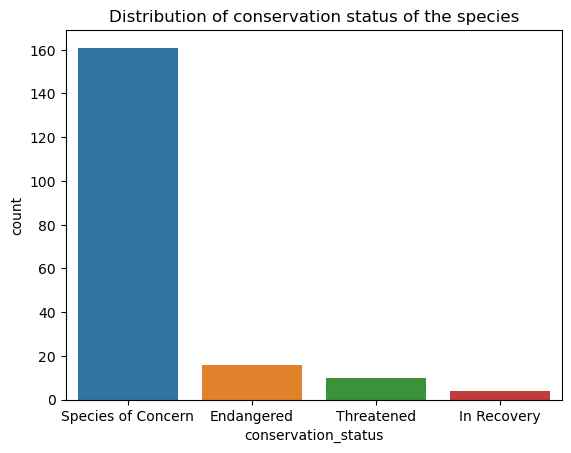

In [11]:
# We will plot a bar chart of the conservation status without including 'Preserved' since we know that it has more than 95%
# of the data
sns.countplot(data=spe,x=spe['conservation_status'][spe['conservation_status'] != 'Preserved'])
plt.title('Distribution of conservation status of the species')

In [12]:
print(f"Amount of species that are in advanced stages of endangerment. This includes the categories: Endangered, Threatened and In Recovery: {spe['conservation_status'][(spe['conservation_status'] != 'Uncategorised') & (spe['conservation_status'] != 'Species of Concern')].count()}")

Amount of species that are in advanced stages of endangerment. This includes the categories: Endangered, Threatened and In Recovery: 5663


Note: We observe that we have a lot of species of concern, however only a select few move to the endangerment stages. I also want to add that the Preserved category can be calculated as the species that are in no danger. With that in mind, we can say that the distribution of the preserved against the endangered species is 5633 vs 191.

### Are certain types of species more likely to be endangered?

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Mammal'),
  Text(1, 0, 'Bird'),
  Text(2, 0, 'Reptile'),
  Text(3, 0, 'Amphibian'),
  Text(4, 0, 'Fish'),
  Text(5, 0, 'Vascular Plant'),
  Text(6, 0, 'Nonvascular Plant')])

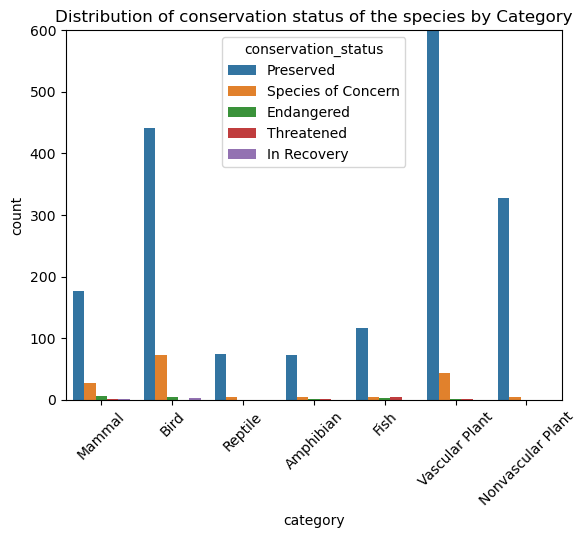

In [13]:
sns.countplot(data=spe,x='category', hue='conservation_status' )
ax = plt.subplot()
ax.set_ylim(0,600)
plt.title('Distribution of conservation status of the species by Category')
plt.xticks(rotation=45)

This time I will plot the same graph but without the Preserved.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Mammal'),
  Text(1, 0, 'Bird'),
  Text(2, 0, 'Reptile'),
  Text(3, 0, 'Amphibian'),
  Text(4, 0, 'Fish'),
  Text(5, 0, 'Vascular Plant'),
  Text(6, 0, 'Nonvascular Plant')])

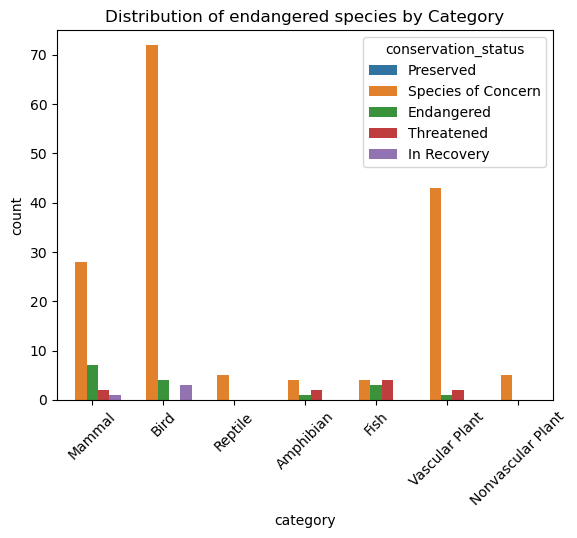

In [14]:
sns.countplot(data=spe,x=spe['category'][spe['conservation_status'] != 'Preserved'], hue=spe['conservation_status'][spe['conservation_status'] != 'Uncategorised'] )
ax = plt.subplot()
ax.set_ylim(0,75)
plt.title('Distribution of endangered species by Category')
plt.xticks(rotation=45)

Note: We can conclude that birds, followed by plants have quite a lot of possible endangered species, as of currently they are still in the category of Concern. The species with the most endangered animals are the mammals. As for threatened to be extinct, we can see that the fish species are on the forefront.

### Which species is the most prevalent? (Top 20)

In [15]:
obs.observations.groupby(obs.scientific_name).sum().sort_values(ascending=False).head(20)

scientific_name
Streptopelia decaocto        1785
Holcus lanatus               1780
Castor canadensis            1725
Hypochaeris radicata         1720
Puma concolor                1711
Procyon lotor                1692
Columba livia                1653
Myotis lucifugus             1547
Bidens tripartita            1296
Oxalis dillenii              1276
Salvelinus fontinalis        1270
Viola arvensis               1261
Centrocercus urophasianus    1253
Brassica rapa                1246
Avena sativa                 1245
Agrostis variabilis          1241
Nepeta cataria               1236
Cirsium scariosum            1232
Butorides virescens          1231
Apocynum androsaemifolium    1231
Name: observations, dtype: int64

This was a very nice surpise. I thought that the top 3 spots would be some type of flower. The first position holds a species of birds, the seconds is by flowers, and the third is by beavers.

### Which park has the most animals?

<BarContainer object of 4 artists>

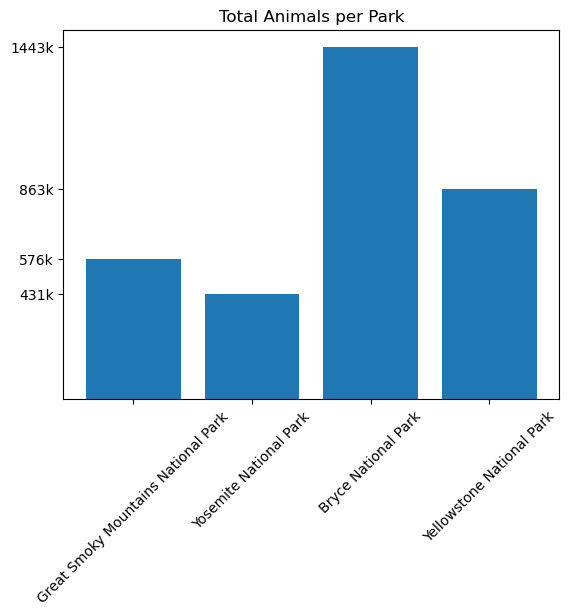

In [16]:
val = obs['observations'].groupby(obs['park_name']).sum() # Total ammount of observations per park
val = list(val)
parks = obs['park_name'].unique() # Park names

ax = plt.subplot()
ax.set_yticks(val)
ax.set_yticklabels(['576k', '431k', '1443k', '863k']) # Setting 
plt.xticks(rotation=45)
plt.title("Total Animals per Park")
plt.bar(parks, val)

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also avke to answer some of the questions posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - The study found that the bird species Streptopelia decaocto occurred the most number of times.
- Which park has the most animals?
    - We saw that the Bryze National Park has a substansial larger ammount of animals than the rest of the parks.

## Further Research

This dataset only included observations from the last 7 days which prohibits analyze changes over time. It would be curious to see how the conservation status for various species changes over time. Another piece that is missing is the Area of each park, it can be assumed that Yellowstone National Park might be much larger than the other parks which would mean that it would exhibit more observations and greater biodiversity. Lastly, if precise locations were recorded, the spatial distribution of the species could also be observed and test if these observations are spatially clustered. 